In [23]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata

In [24]:
df = pdata.SP500_monthly()
df.head()

,ds,y
0,"Mar 1, 2018",2677.67
1,"Feb 1, 2018",2816.45
2,"Jan 1, 2018",2683.73
3,"Dec 1, 2017",2645.10
4,"Nov 1, 2017",2579.36


In [28]:
df['ds'] = df['ds'].map(lambda d: pd.to_datetime(d))

In [35]:
df = df[(df['ds']>datetime.date(2000,1,1))]

In [41]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=3)
m.fit(df)
future = m.make_future_dataframe(periods=50, freq='M')
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


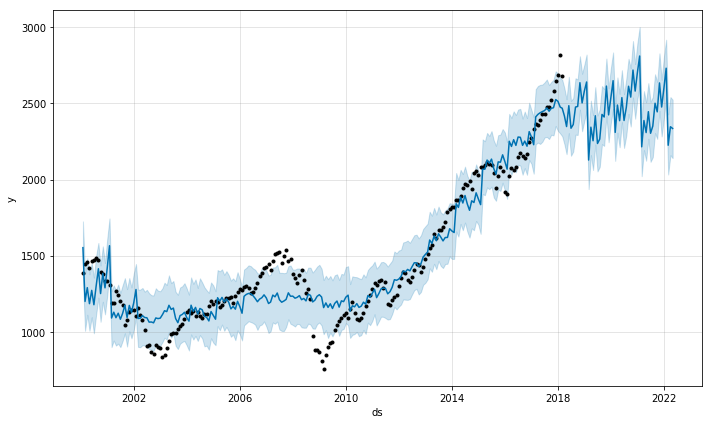

In [42]:
m.plot(forecast)

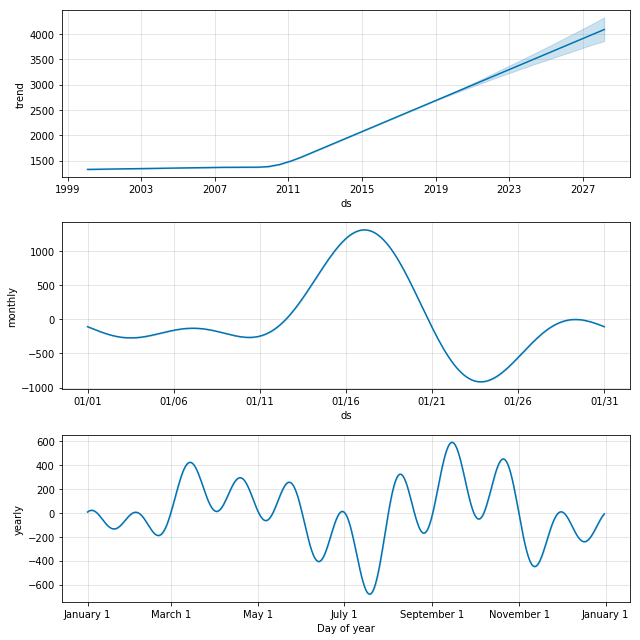

In [38]:
m.plot_components(forecast, uncertainty=True, plot_cap=True)